# Google Play Store Dataset

# Steps which are involved :
1.Importing necessary libraries
2.Loading dataset
3.Data Cleaning/ Perform basic data quality check 
4.Exploratory data analysis

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline


# Loading the dataset

In [2]:
data=pd.read_csv("googleplaystore.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Check the dimension of the data
data.shape

(10841, 13)

In [4]:
#Check columns of the dataset
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
#Check the missing values and data types of  columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
#Summary of the dataset
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
#Check  for duplicate values
data.duplicated().sum()

483

In [8]:
#Check for missing values
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Observations
The dataset has some missing/null values 


# Data Cleaning

In [10]:
rating_mean=data['Rating'].mean()
data['Rating'].fillna(rating_mean,inplace=True)

In [11]:
current_ver_mode=data['Current Ver'].mode()[0]
data['Current Ver'].fillna(current_ver_mode,inplace=True)

In [12]:
andr_ver_mode=data['Android Ver'].mode()[0]
data['Android Ver'].fillna(andr_ver_mode,inplace=True)

In [13]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [14]:
#Handling Review feature
data['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [15]:
#Checking numeric values in Review column 
data['Reviews'].str.isnumeric().sum()

10840

In [16]:
#Check and display rows where Reviews are not numeric
data[~data['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


In [17]:
#Converting 3.0 M value into numeric
data.loc[10472, 'Reviews']=float(data.loc[10472,'Reviews'].replace('M',''))*1_000_000


In [18]:
#check and verify 
data.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                         3000000.0
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                    4.1 and up
Name: 10472, dtype: object

In [19]:
#Converting the datatype of Reviews column into integer
data['Reviews']=data['Reviews'].astype(int)

In [20]:
data.info()#verifying the conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int32  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10841 non-null  object 
 12  Android Ver     10841 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.0+ MB


In [21]:
#Handling Size feature
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [22]:
#Cleaning the 'Size' column
data['Size']=data['Size'].str.replace('M','e6').str.replace('k','e3')
data['Size']=data['Size'].replace('Varies with device',np.nan)
data['Size']=data['Size'].str.replace(',','').str.replace('+','')


In [23]:
#Converting the Size column's datatype into float
data['Size']=data['Size'].astype(float)

In [24]:
data['Size']

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10836    53000000.0
10837     3600000.0
10838     9500000.0
10839           NaN
10840    19000000.0
Name: Size, Length: 10841, dtype: float64

In [25]:
#Handling Installs
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [26]:
#Clean up 'Installs' column
data['Installs']=data['Installs'].str.replace(',','').str.replace('+','')
data['Installs']=data['Installs'].replace('Free','0')


In [27]:
data['Installs']=data['Installs'].astype(int)

In [28]:
data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [29]:
#Handling Price column
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [30]:
#Cleaning up the Price column
data['Price']=data['Price'].replace('Everyone','0')
data['Price']=data['Price'].str.replace('$','').astype(float)

In [31]:
data['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [32]:
data['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [33]:
#Covert 'Last Updated' to datetime 
data['Last Updated']=pd.to_datetime(data['Last Updated'],errors='coerce')
data['Day']=data['Last Updated'].dt.day
data['Month']=data['Last Updated'].dt.month
data['Year']=data['Last Updated'].dt.year

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  int32         
 4   Size            9146 non-null   float64       
 5   Installs        10841 non-null  int32         
 6   Type            10840 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10841 non-null  object        
 12  Android Ver     10841 non-null  object        
 13  Day             10840 non-null  float64       
 14  Month           10840 non-null  float64       
 15  Ye

In [35]:
#Check the null values in Day, Month and Year
null_values=data[['Day','Month','Year']].isnull().sum()
null_values

Day      1
Month    1
Year     1
dtype: int64

In [36]:
#Fill  null values with mode 
for column in ['Day','Month','Year']:
    mode_value=data[column].mode()[0]
    data[column]=data[column].fillna(mode_value)

In [37]:
data[['Day','Month','Year']].isnull().sum()


Day      0
Month    0
Year     0
dtype: int64

In [38]:
#Converting the datatypes of these columns 
data['Day']=data['Day'].astype(int)
data['Month']=data['Month'].astype(int)
data['Year']=data['Year'].astype(int)


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  int32         
 4   Size            9146 non-null   float64       
 5   Installs        10841 non-null  int32         
 6   Type            10840 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10841 non-null  object        
 12  Android Ver     10841 non-null  object        
 13  Day             10841 non-null  int32         
 14  Month           10841 non-null  int32         
 15  Ye

In [40]:
#Handling the type and content rating column
data['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [41]:
data['Type']=data['Type'].replace('0','Free')

In [42]:
mode_vl=data['Type'].mode()[0]
data['Type']=data['Type'].fillna(mode_vl)

In [43]:
data['Type'].isnull().sum()

0

In [44]:
#data.info()

In [45]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [46]:
mode_of_rating=data['Content Rating'].mode()[0]
data['Content Rating']=data['Content Rating'].fillna(mode_of_rating)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  int32         
 4   Size            9146 non-null   float64       
 5   Installs        10841 non-null  int32         
 6   Type            10841 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10841 non-null  object        
 12  Android Ver     10841 non-null  object        
 13  Day             10841 non-null  int32         
 14  Month           10841 non-null  int32         
 15  Ye

In [48]:
data.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1695
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         1
Current Ver          0
Android Ver          0
Day                  0
Month                0
Year                 0
dtype: int64

In [49]:
#Convert clean dataset into csv file
data.to_csv('googleplaystore_cleaned.csv')

# EDA

In [50]:
#Extracting Numerical and categorical columns from dataset
numeric_features=[feature for feature in data.columns if data[feature].dtype !='O']
categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']

print('Total {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('\nTotal {} categorical features : {}'.format(len(categorical_features),categorical_features))

Total 9 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']

Total 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


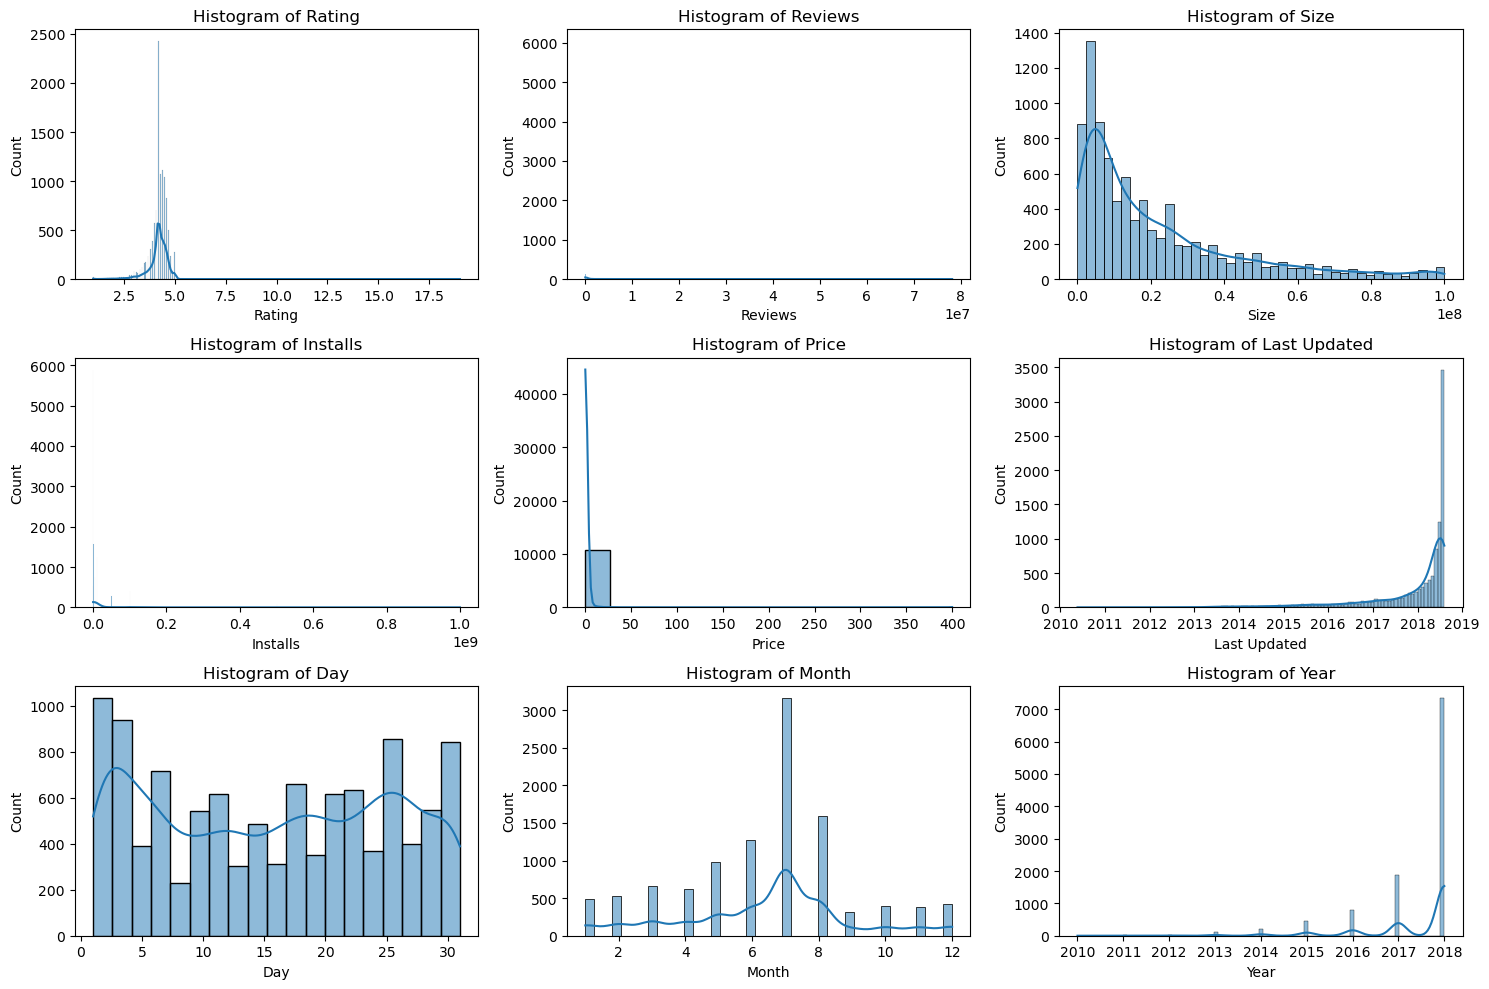

In [51]:
#Histograms
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,10))
axes=axes.flatten()
for i,feature in enumerate(numeric_features):
    sns.histplot(data[feature].dropna(),kde=True,ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    
for j in range(len(numeric_features),9):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

# Insights 
Price,Rating and Size are Right skewed  while Last updated and Year are left skewed

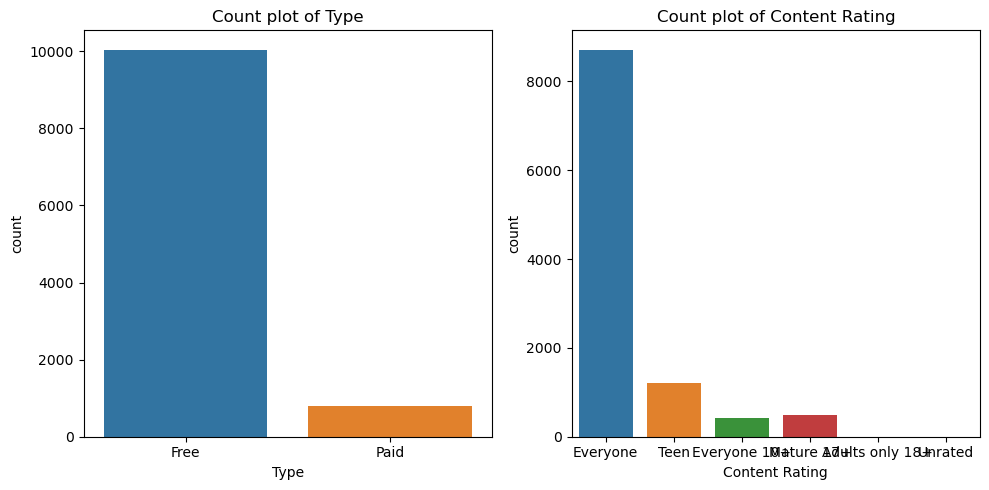

In [52]:
#Count plots
fig ,axes =plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axes=axes.flatten()
categorical_features=['Type','Content Rating']
for i ,feature in enumerate(categorical_features):
    sns.countplot(x=data[feature],ax=axes[i])
    axes[i].set_title(f'Count plot of {feature}')
                      
plt.tight_layout()
plt.show()

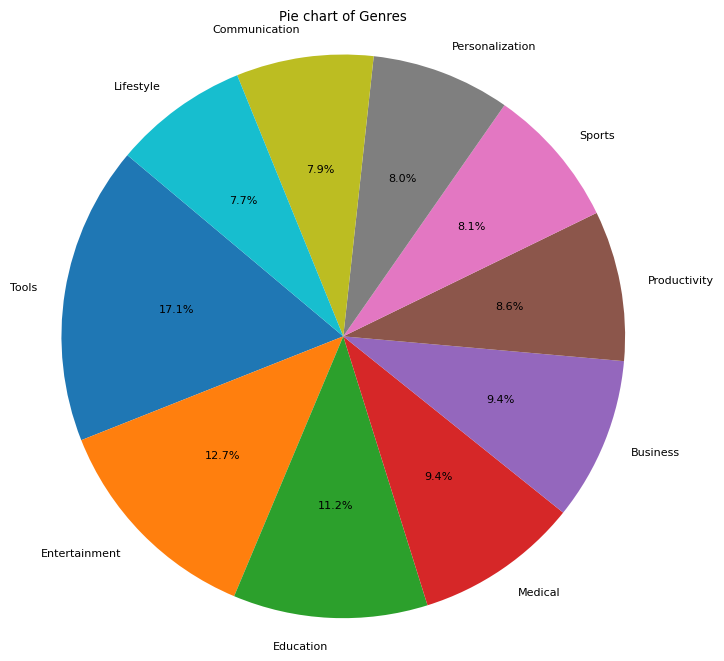

In [53]:
#Pie chart of top 10 Genres
genre_counts=data['Genres'].value_counts().nlargest(10)
plt.figure(figsize=(8,8))
plt.rcParams['font.size']=8
plt.pie(genre_counts,labels=genre_counts.index,autopct='%1.1f%%',startangle=140)
plt.title('Pie chart of Genres')
plt.axis('equal')
           
plt.show()

# Insights
1.Majority type of apps on google playstore is free
2.The most prevalent content rating across apps on the google playstore is Everyone, indicate widespread availability and appeal to users of all ages.


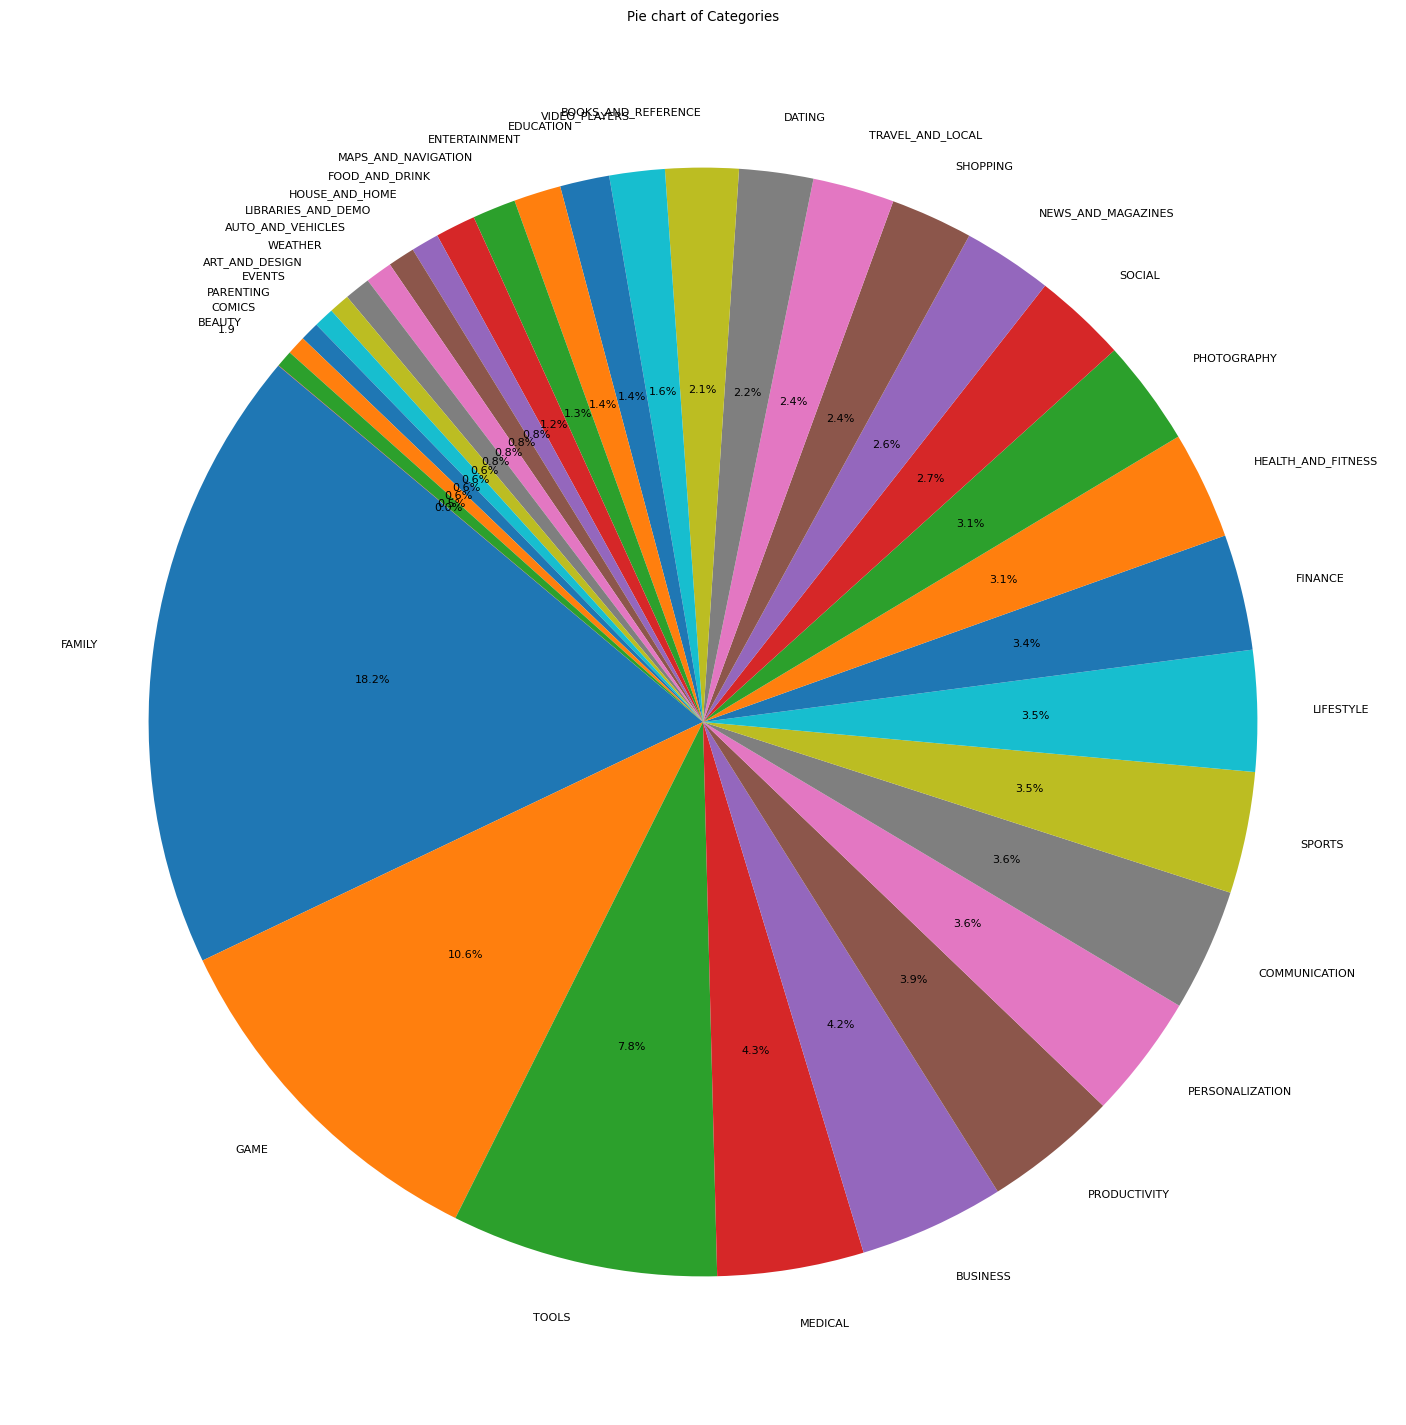

In [54]:
#Pie chart of Category
plt.figure(figsize=(18,18))
data['Category'].value_counts().plot.pie(autopct='%1.1f%%',startangle=140)
plt.title('Pie chart of Categories')
plt.ylabel('')

plt.show()


# Insights

 1.Most of the categories of apps on google playstore  lie under Family, Game and Tools

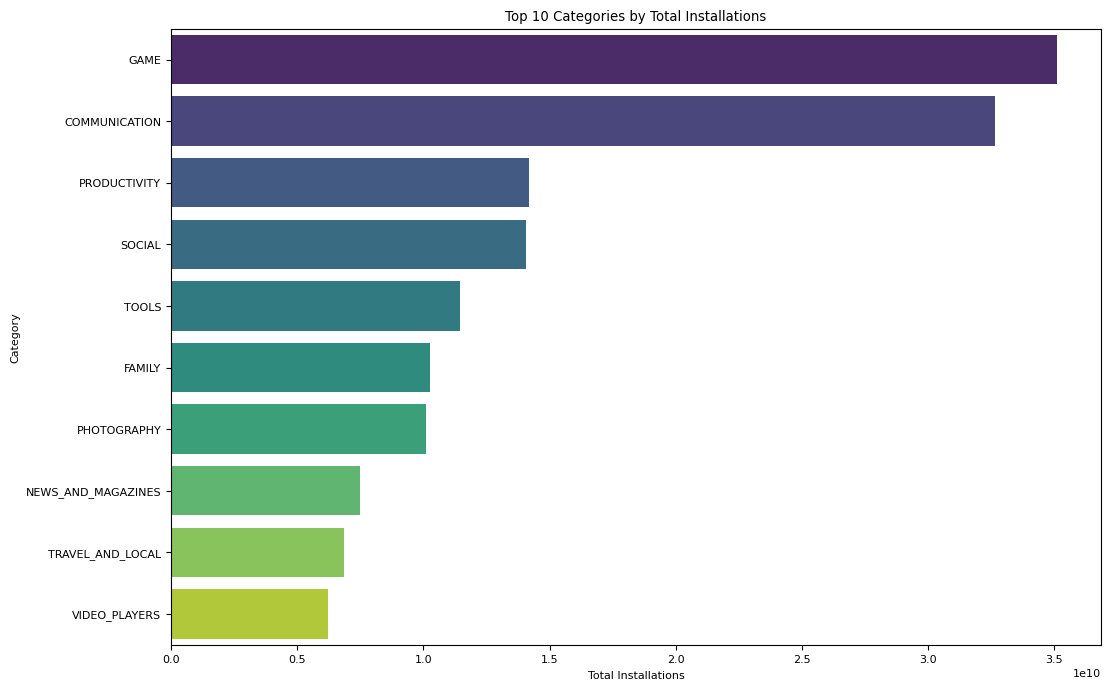

In [55]:
#Group by categories and sum the installations
category_installs=data.groupby('Category')['Installs'].sum()
top_10_categories=category_installs.sort_values(ascending=False).head(10)
plt.figure(figsize=(12,8))
sns.barplot(x=top_10_categories.values,y=top_10_categories.index,palette='viridis')
plt.title('Top 10 Categories by Total Installations')
plt.xlabel('Total Installations')
plt.ylabel('Category')
plt.show()

# Insight
Out of all the categories 'Game' and 'Communication' has the most number of installations.

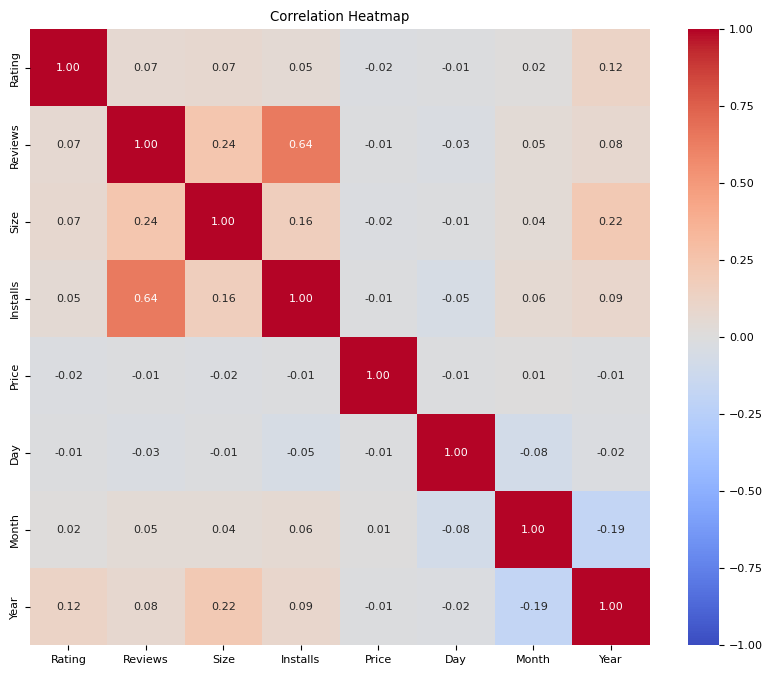

In [56]:
#Correlation plot
corr_matrix=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Insights
There exists positive as well as negative correlation between columns

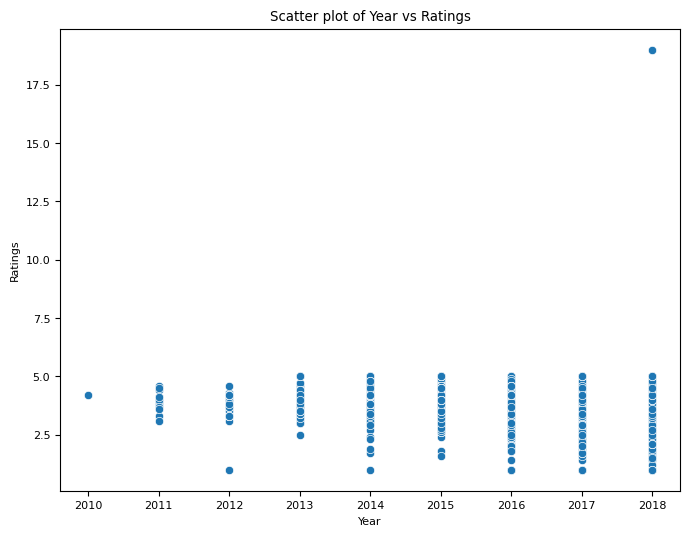

In [57]:
#Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Year',y='Rating',data=data)
plt.title('Scatter plot of Year vs Ratings')
plt.xlabel('Year')
plt.ylabel('Ratings')
plt.show()

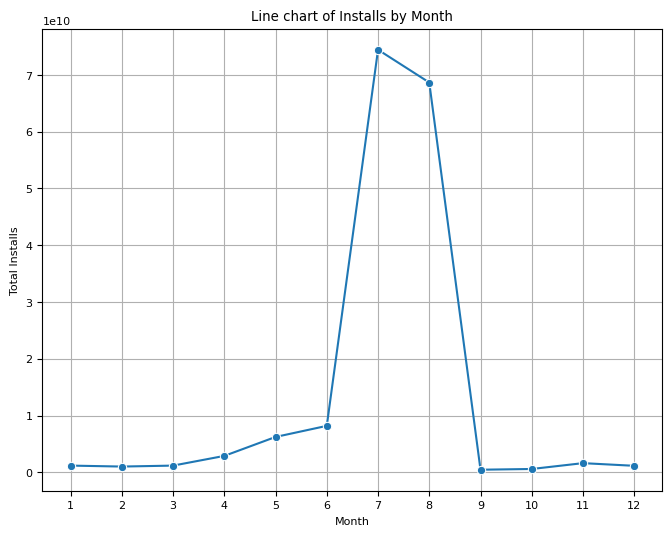

In [59]:
#Line chart
monthly_installs=data.groupby('Month')['Installs'].sum().reset_index()
plt.figure(figsize=(8,6))
sns.lineplot(x='Month',y='Installs',data=monthly_installs,marker='o')
plt.title('Line chart of Installs by Month')
plt.xlabel('Month')
plt.ylabel('Total Installs')
plt.xticks(monthly_installs['Month'])
plt.grid(True)
plt.show()

# Insights
In 7 and 8 month , the total of installsment is higher.

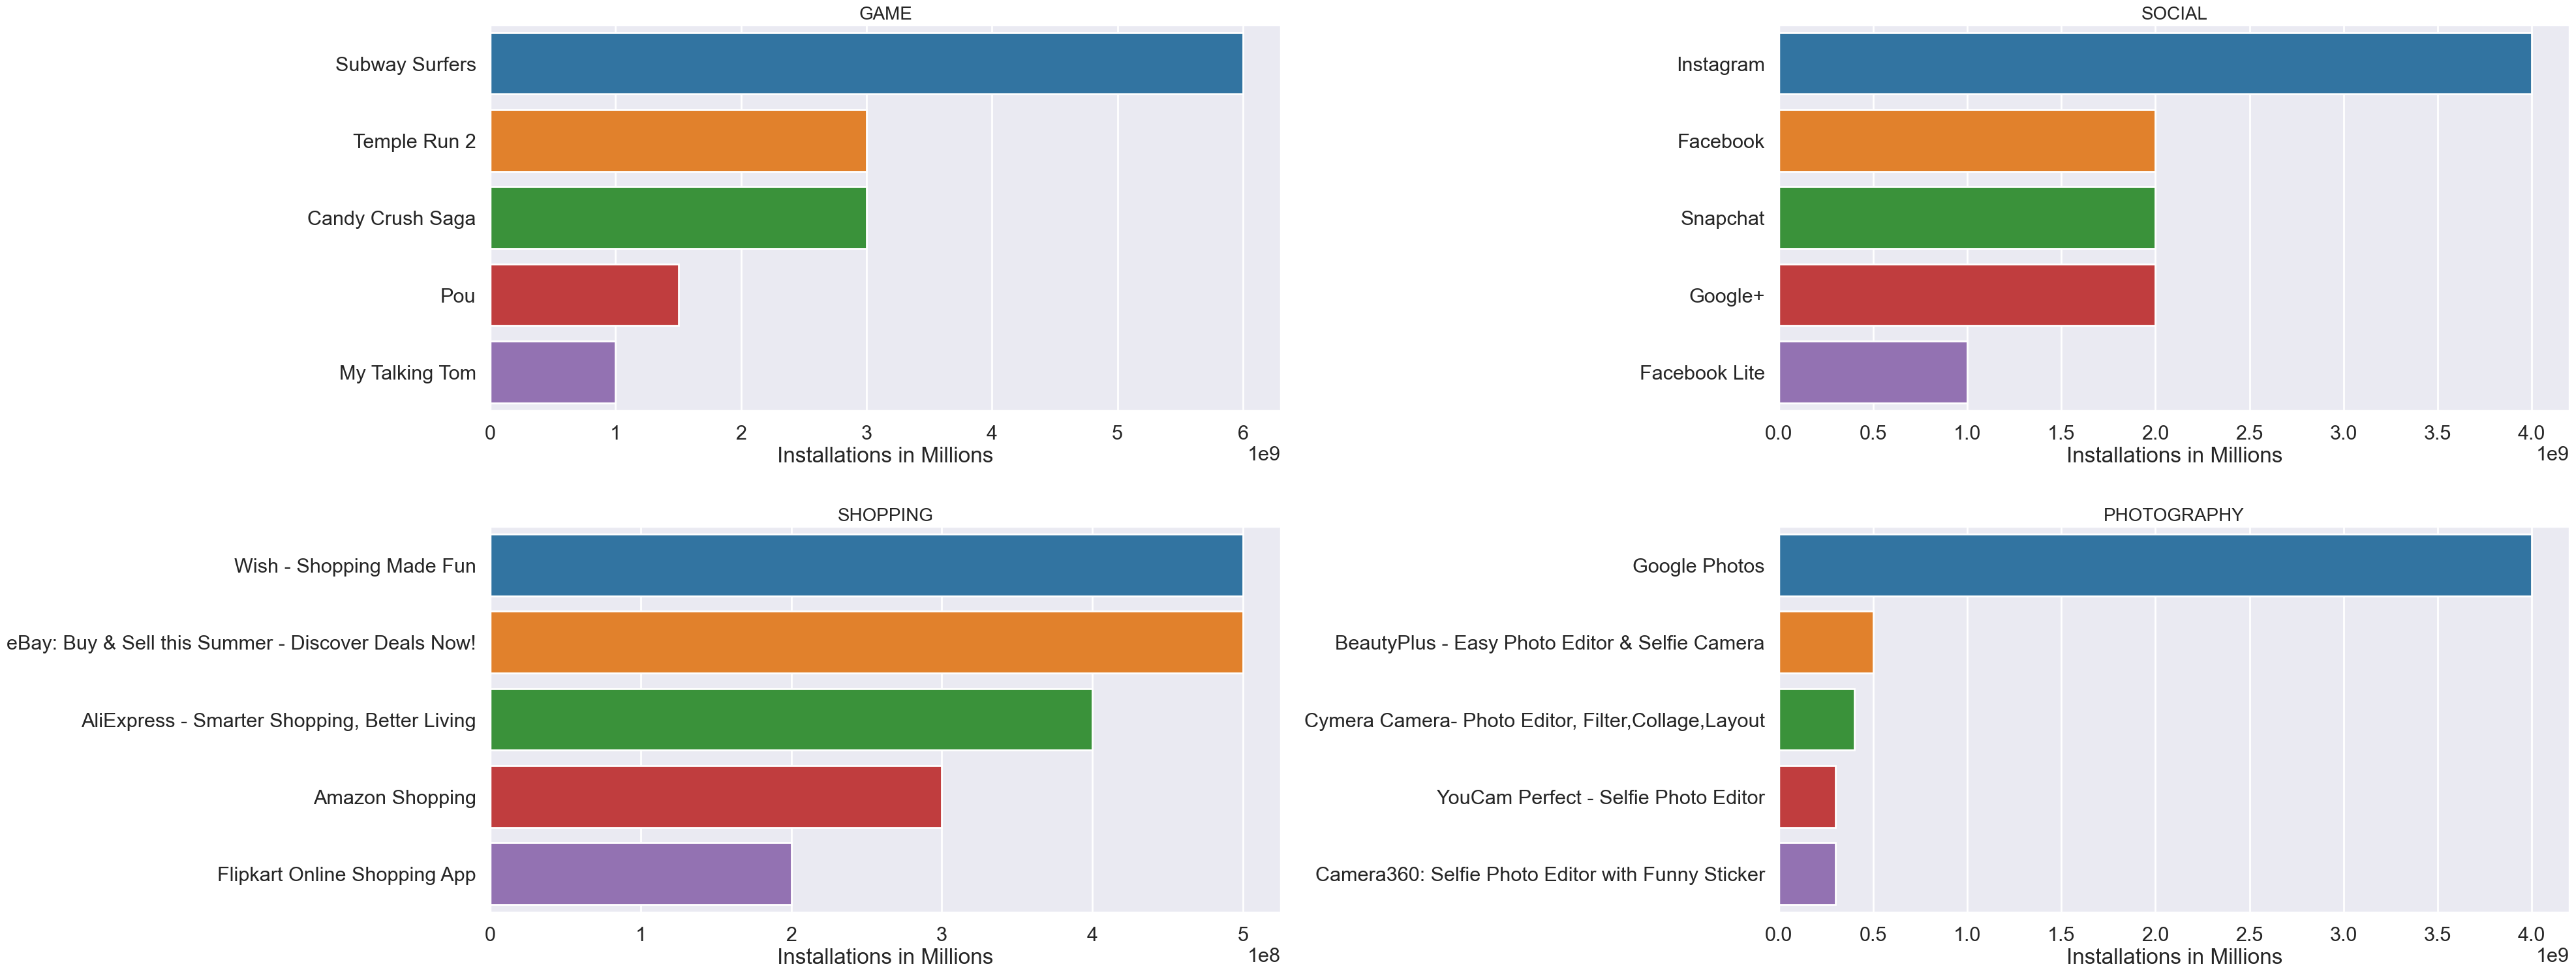

In [60]:
dfa=data.groupby(['Category','App'])['Installs'].sum().reset_index()
dfa=dfa.sort_values('Installs',ascending=False)
#define the categories 
apps=['GAME','SOCIAL','SHOPPING','PHOTOGRAPHY']
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(40,30))
for i ,app in enumerate(apps):
    df2=dfa[dfa.Category==app]
    df3=df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data=df3,x='Installs',y='App')
    plt.xlabel('Installations in Millions')
    plt.ylabel('')
    plt.title(app,size=20)
    
plt.tight_layout()
plt.subplots_adjust(hspace=.3)
plt.show()

# Insights
1.Most popular game is Subway surfers.
2.Most popular social app is Instagram.
3.Most popular shopping app among users is Wish -shopping made fun app.
4.And the most popular photography app is Google photos.

In [63]:
# Total Apps on google play store which gets rating as 5
df_ratings_5=data[data['Rating']==5.0]
count_ratings_5=df_ratings_5['App'].count()
count_ratings_5


274

# THANK YOU!!